# Wine quality evalution

### Importing modules

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn

### Importing dataset

In [2]:
dataset = pd.read_csv('./data/wine_quality.csv')

### Previewing dataset

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Summary of dataset features

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Missing values

In [5]:
print(dataset.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Histogram of ‘quality’ variable

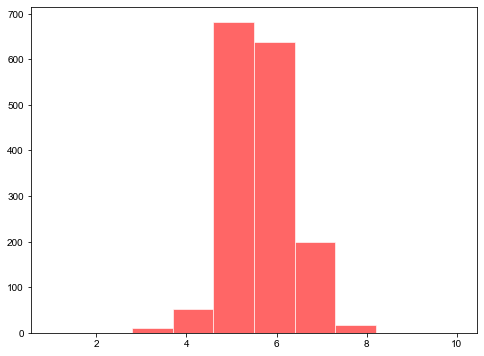

In [6]:
plt.subplots(figsize=(8,6))
sn.set_style('whitegrid')
count, bins, patch = plt.hist(dataset['quality'], 10, alpha=0.6, color='r', range=(1,10))

## Coorelation Matrix

<AxesSubplot:>

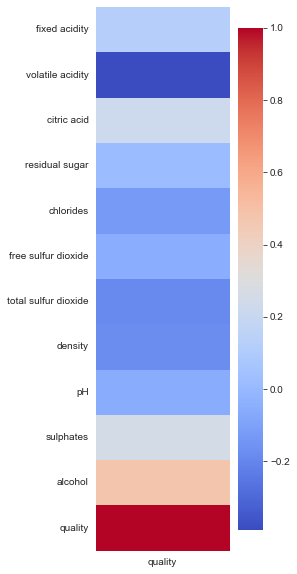

In [7]:
plt.subplots(figsize=(3,10))
corrMatrix = dataset.corr()
# sn.heatmap(corrMatrix, cmap='coolwarm')
col = corrMatrix[['quality']]
sn.heatmap(col, cmap='coolwarm')

### Creating column quality_cat (quality category)

In [8]:
# conditions for alloting values
conditions = [
    (dataset['quality'] <= 4),
    (dataset['quality'] > 4) & (dataset['quality'] <7),
    (dataset['quality'] >= 7)
    ]
# values to be alloted
values = ['LOW', 'MEDIUM', 'HIGH']
dataset['quality_cat'] = np.select(conditions, values)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,MEDIUM
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,MEDIUM
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,MEDIUM
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,MEDIUM
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,MEDIUM


## Selecting columns

In [79]:
# input 
x = dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]].values 
  
# output 
y = dataset.iloc[:, 12].values 

## Splitting the dataset to train and test

### Importing modules

In [80]:
from sklearn.model_selection import train_test_split 

In [81]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

## Performing feature scaling
Perform feature scaling here because all column values lie in different ranges.

### Importing modules

In [82]:
from sklearn.preprocessing import StandardScaler

### Performing scaling using standard scaler

In [83]:
sc_x = StandardScaler() .fit(xtrain)
xtrain = sc_x.transform(xtrain)  
xtest = sc_x.transform(xtest) 

In [84]:
print (xtrain[0:10, :])
print (xtest[0:10, :])

[[ 0.03570115  1.17013908 -0.82797173 -0.44535192  0.05763613 -0.01249644
   0.45986418 -0.13691731 -0.77068411  0.91195248 -0.75660071]
 [-0.42519441 -0.54734879  0.09751438 -0.30996223 -0.25411901  0.27020598
   0.54814103  0.22478253  0.59078753 -0.10608706 -0.85048089]
 [ 0.03570115  0.16145573 -1.18788299 -0.37765707 -0.10863328 -0.57790127
  -0.74658599  0.44818537 -0.57618817 -1.2372421  -0.75660071]
 [-0.88608996  1.38823278 -1.39354657 -0.10687769  0.3486076  -0.20096471
  -0.51118108 -0.08372616  1.36877132 -0.61510683  0.27608135]
 [-0.59803024 -0.43830194  0.45742565  2.26244196 -0.27490269 -0.38943299
   1.16607892  0.55456768  0.13696365  0.96851023  0.08832098]
 [ 0.89988031  0.5431197  -0.15956509 -0.10687769 -0.21255166 -0.95483782
  -0.42290424  0.34180306 -1.41900394 -0.50199132 -0.94436108]
 [-1.40459746  0.1069323  -0.87938762 -0.24226738 -0.5243068   2.15488875
   0.10675682 -0.87095522  1.36877132  0.57260597  0.74548229]
 [ 0.4965967  -0.92901276  0.35459386 -0.

## Training Logistic Regression model

### Importing modules

In [85]:
from sklearn.linear_model import LogisticRegression 

### Traning model

In [86]:
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain) 

LogisticRegression(random_state=0)

### Prediction on testing data

In [87]:
y_pred = classifier.predict(xtest)

Predicting individual values

In [105]:
arr = np.array(dataset.iloc[0][0:11])
val = sc_x.transform(np.expand_dims(arr, axis=0))

In [107]:
qual = classifier.predict(val)
qual

array(['MEDIUM'], dtype=object)

##  Testing the performance of model

### Importing modules

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

### Creating Confusion Matrix

In [109]:
labels = ['LOW','MEDIUM','HIGH']
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix: \n", cm) 

Confusion Matrix: 
 [[ 17   0  28]
 [  1   0  15]
 [ 14   0 325]]


### Graphical Representaion

/home/totoro/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


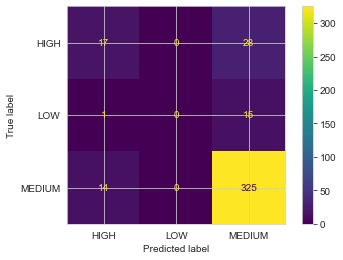

In [110]:
plot_confusion_matrix(classifier, xtest, ytest)

### Creating Classsification Report

In [111]:
cr = classification_report(ytest, y_pred)
print ("Classification Report: \n", cr) 

Classification Report: 
               precision    recall  f1-score   support

        HIGH       0.53      0.38      0.44        45
         LOW       0.00      0.00      0.00        16
      MEDIUM       0.88      0.96      0.92       339

    accuracy                           0.85       400
   macro avg       0.47      0.45      0.45       400
weighted avg       0.81      0.85      0.83       400



/home/totoro/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/totoro/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/totoro/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Saving Model

In [112]:
import pickle

In [113]:
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))